In [7]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import math

In [8]:
data = yf.download('BTC-USD','2012-01-01','2020-10-10')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [9]:
def crossover_sinal(data):
  #Criar Sinais de compra e venda
  data['SMA15'] = data['Close'].rolling(15).mean()
  data['SMA50'] = data['Close'].rolling(50).mean()

  data['Anter'] = data['SMA15'].shift(1) - data['SMA50'].shift(1)
  data['Atual'] = data['SMA15'] - data['SMA50']

  data.loc[(data['Anter']<0)&(data['Atual']>0),'Compra'] = data['Close']
  data.loc[(data['Anter']>0)&(data['Atual']<0),'Venda'] = data['Close']

  columns = ['Close','SMA15','SMA50','Compra','Venda']

  return data[columns]

In [10]:
output_df = crossover_sinal(data)
output_df.tail()

,Close,SMA15,SMA50,Compra,Venda
Date,,,,,
2020-10-05,10804.000977,10654.898633,10965.659082,NaN,NaN
2020-10-06,10621.664062,10665.525586,10933.004316,NaN,NaN
2020-10-07,10679.136719,10674.904036,10906.762383,NaN,NaN
2020-10-08,10923.627930,10721.421615,10890.069277,NaN,NaN
2020-10-10,11296.361328,10758.142448,10878.429062,NaN,NaN


In [11]:
filtered_data = output_df.loc[(output_df.index<'2020-12-01') & (output_df.index>'2019-01-01')]

Text(0.5, 0, 'Data')

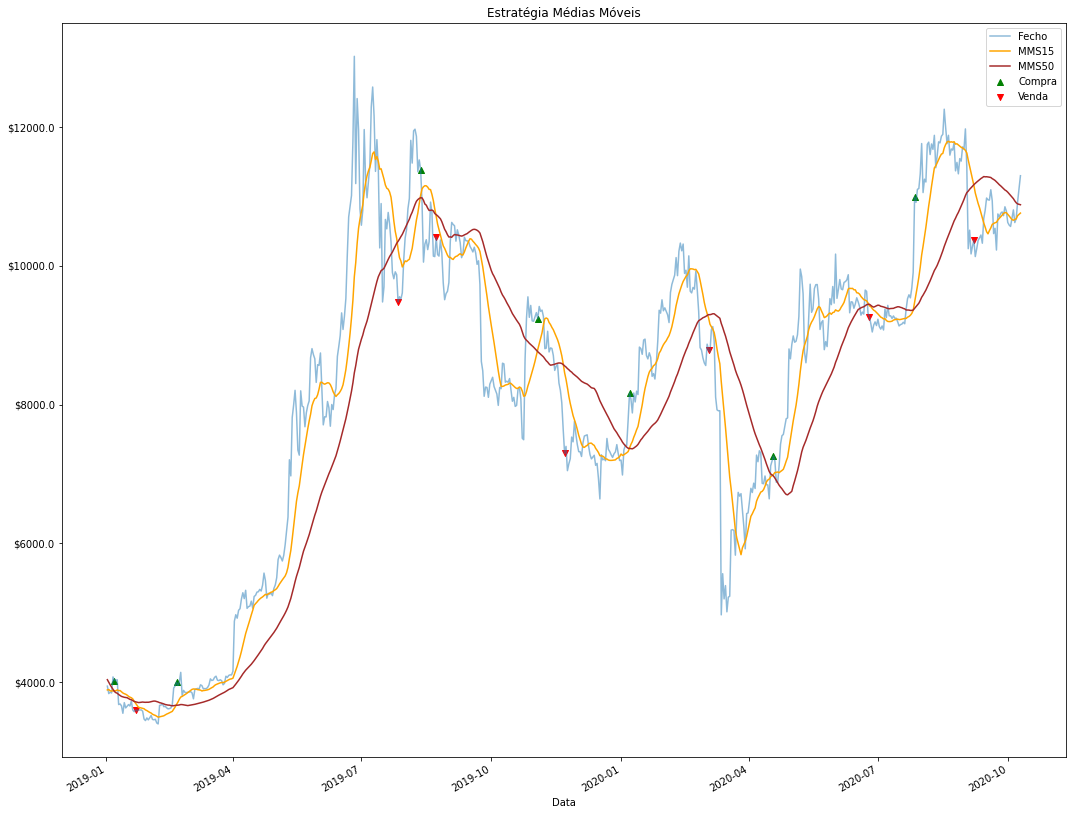

In [16]:
fig, ax = plt.subplots(figsize=(18, 15))

#Adicionar Informação
ax.plot(filtered_data.index,filtered_data['Close'],label='Fecho',alpha=0.5)
ax.plot(filtered_data.index,filtered_data['SMA15'],label='MMS15',color='orange')
ax.plot(filtered_data.index,filtered_data['SMA50'],label='MMS50',color='brown')

#Adicionar Venda e Compra
ax.scatter(filtered_data.index,filtered_data['Compra'],label='Compra',marker='^',color='green')
ax.scatter(filtered_data.index,filtered_data['Venda'],label='Venda',marker='v',color='red')

#formatar
fig.autofmt_xdate()
ax.legend()

#Labels adicionais
ax.yaxis.set_major_formatter('${x:}')
ax.set_title('Estratégia Médias Móveis')
ax.set_xlabel('Data')